TODO: 
load/save state dict - V

1.   arcface loss - maybe done 
2.   dual attention network - V



experiments:

preprocessing:
1.   normelize pictures - V

1.   normelize last layer? - V
2.   change cotrastive to triplet? - V

1.   higher resnet? - V
2.   OTHER dataset? LFW? - V

1.   online mining 









In [ ]:
# This mounts Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append('/content/drive/My Drive/MiNet-test')


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torch import optim
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from Utils.Generators import PairSet
from Utils.Generators import lfwGenerator
from Utils.Models import resnet
from Utils.Optim import LossClass
from Utils.Optim import contrastive
from Utils.Optim import TripletLoss

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

cuda


Flicker Dog dataset TRAIN

In [ ]:
## mod -> higher mod = more negative pairs ##

# transformTrain = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
# trainDb = PairSet.PairSet("/content/drive/MyDrive/MiNet-test/Flickr-dog-train/",transformTrain,mod=30)
# trainLoader = torch.utils.data.DataLoader(trainDb,batch_size=50,shuffle=True)

# trainDb = datasets.ImageFolder("/content/drive/MyDrive/MiNet-test/Flickr-dog-train/",transformTrain)
# trainLoader = torch.utils.data.DataLoader(trainDb,batch_size=(len(trainDb.targets)),shuffle=True)

LFW dataset TRAIN

In [ ]:
# transformTrain = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
# trainPathToData = "/content/drive/MyDrive/MiNet-test/lfw-deepfunneled"
# # trainPathToData = "/content/drive/MyDrive/MiNet-test/lfw-backup"
# trainPairsPath = "/content/drive/MyDrive/MiNet-test/lfw-txt/pairsDevTrain.txt"
# trainDb = lfwGenerator.lfwGenerator(trainPathToData,trainPairsPath,transformTrain)
# # trainDb = PairSet.PairSet("/content/drive/MyDrive/MiNet-test/Flickr-dog-train/",transformTrain,mod=30)
# trainLoader = torch.utils.data.DataLoader(trainDb,batch_size=30,shuffle=True)

In [ ]:
transformTrain = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
trainDb = datasets.ImageFolder("/content/drive/MyDrive/MiNet-test/Flickr-dog-train/",transform=transformTrain)
trainLoader = torch.utils.data.DataLoader(trainDb,batch_size=(len(trainDb.targets)),shuffle=True)

NameError: ignored

In [ ]:
model.eval()
with torch.no_grad():
  for batch_idx, (pic,label) in enumerate(trainLoader):
    torch.cuda.empty_cache()
    anchor = pic.to(device)
    positive = label.to(device)
    embdpic = model(anchor)
    print(batch_idx)
print("done")

KeyboardInterrupt: ignored

Create test dataset

Flicker dog dataset TEST

In [ ]:
# transformTest = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
# ])
# testDb= PairSet.PairSet("/content/drive/MyDrive/MiNet-test/Flickr-dog-test/",transformTest,mod=5)
# testLoader = torch.utils.data.DataLoader(testDb,batch_size=30,shuffle=False)

# # testDb= datasets.ImageFolder("/content/drive/MyDrive/MiNet-test/Flickr-dog-test/",transformTest)

LFW dataset TEST

In [ ]:
# transformTest = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
# testPathToData = "/content/drive/MyDrive/MiNet-test/lfw-deepfunneled"
# testPairsPath = "/content/drive/MyDrive/MiNet-test/lfw-txt/pairsDevTest.txt"
# # testDb= PairSet.PairSet("/content/drive/MyDrive/MiNet-test/Flickr-dog-test/",transformTest,mod=5)
# testDb = lfwGenerator.lfwGenerator(testPathToData,testPairsPath,transformTrain)
# testLoader = torch.utils.data.DataLoader(testDb,batch_size=20,shuffle=False)

Count pairs for train and test

In [ ]:
# ## IMPORTANT - DO NOT DELETE ##

# falseL=0
# trueL=0
# for batch_idx, (x1, x2,label1,label2) in enumerate(trainLoader):
#   print(label1)
#   print(label2)
#   # BatchTrue=label.sum()
#   # trueL+=BatchTrue
#   # falseL+=len(label)-BatchTrue

# # print(trueL, falseL)

# # falseL=0
# # trueL=0
# # for batch_idx, (x1, x2,label) in enumerate(testLoader):
# #   BatchTrue=label.sum()
# #   trueL+=BatchTrue
# #   falseL+=len(label)-BatchTrue

# # print(trueL, falseL)


Model creation

In [ ]:
# del model
# model = resnet.resnet50(pretrained=True)

from Utils.Models import resnetWithDAN
# model = resnetWithDAN.resnet50(pretrained = True)
model = resnetWithDAN.resnet50(pretrained = False)
# model.to(device)
# all(p.is_cuda for p in model.parameters())

# for param in model.parameters():
#   print(param.data)
# print('-------------------------------------------------------------------------')

### Load Weights ###
model.load_state_dict(torch.load('/content/drive/MyDrive/MiNet-test/Utils/Models/resnet50DAN_all_tripletsLFW_epoch4.pth'))
model.to(device)
all(p.is_cuda for p in model.parameters())
# for param in model.parameters():
#   print(param.data)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Utils

In [ ]:
optimizer = optim.Adam(model.parameters(),lr=0.0001,betas=(0.5,0.999))

# optimizer2 = optim.SGD(model.parameters(),lr=0.0005,momentum=0.9,weight_decay=0.0005)
# margin = 0.65
margin = 0.7
#criterion = contrastive.ContrastiveLoss(margin=margin)



### Contrastive Loss + ArcFace Loss ###
# criterion = LossClass.LossClass(contrastiveMargin=margin,arcMargin=0.50,arcScale=30)

## ARCFACE?

################# Triplet loss #######################
criterion = TripletLoss.TripletLoss(margin)

Train function Flicker Dog

In [ ]:
# def trainFlicker(epoch,margin,lossList):
#   TP=0
#   FP=0
#   FN=0
#   TN=0
#   total_loss = 0

#   model.train()
#   for batch_idx, (x1, x2, y) in enumerate(trainLoader):
#     x1, x2, y = x1.to(device), x2.to(device), y.to(device)
#     optimizer.zero_grad()
#     embeddingX1, embeddingX2 = model(x1), model(x2)
#     # ||embeddingX1 - embeddingX2|| < margin  => y=1 TP
#     loss = criterion(embeddingX1, embeddingX2, y) 
#     loss.backward()
#     optimizer.step()

# # Accuracy computation
#     diff = embeddingX1 - embeddingX2
#     dist_sq = torch.sum(torch.pow(diff, 2), 1)
#     dist = torch.sqrt(dist_sq)

#     predictedVal = torch.where((dist<(margin*0.7)),1,0)
#     TP += torch.logical_and(predictedVal, y).sum()
#     FP += torch.logical_and(predictedVal, torch.logical_not(y)).sum()
#     TN += torch.logical_and(torch.logical_not(predictedVal), torch.logical_not(y)).sum()
#     FN += torch.logical_and(torch.logical_not(predictedVal), y).sum()
#     total_loss += loss.item()
#     if batch_idx % 10 == 0:
#       print("Loss = {} at batch = {}".format(loss, batch_idx))
  
#   total_loss /= (batch_idx + 1)
#   lossList.append(total_loss)
#   acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
#   print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
#   print("epoch = {}, Loss= {} , ===========>  Accuracy = {} ".format(epoch, total_loss, acc))



Train Function LFW

In [ ]:
# def trainLFW(epoch,margin,lossList):
#   TP=0
#   FP=0
#   FN=0
#   TN=0
#   total_loss = 0

#   model.train()
#   for batch_idx, (x1, x2, y1,y2) in enumerate(trainLoader):
#     torch.cuda.empty_cache()
#     x1= x1.to(device)
#     x2=x2.to(device)
#     y = np.zeros((1,(len(y1))))
#     for i in range(len(y1)):
#       y[0][i] = y1[i]==y2[i]
#     y = torch.tensor(y)
#     # 
#     #y = y.view(1,-1)
#     y=y.to(device)
#     optimizer.zero_grad()
#     embeddingX1, embeddingX2 = model(x1), model(x2)
#     # ||embeddingX1 - embeddingX2|| < margin  => y=1 TP
#     loss = criterion(embeddingX1, embeddingX2, y) 
#     loss.backward()
#     optimizer.step()
#     # optimizer2.step()

# # Accuracy computation
#     diff = embeddingX1 - embeddingX2
#     dist_sq = torch.sum(torch.pow(diff, 2), 1)
#     dist = torch.sqrt(dist_sq)
    
#     predictedVal = torch.where((dist<(margin*0.7)),1,0)
#     TP += torch.logical_and(predictedVal, y).sum()
#     FP += torch.logical_and(predictedVal, torch.logical_not(y)).sum()
#     TN += torch.logical_and(torch.logical_not(predictedVal), torch.logical_not(y)).sum()
#     FN += torch.logical_and(torch.logical_not(predictedVal), y).sum()
#     total_loss += loss.item()
#     if batch_idx % 10 == 0:
#       print("Loss = {} at batch = {}".format(loss, batch_idx))
  
#   total_loss /= (batch_idx + 1)
#   lossList.append(total_loss)
#   acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
#   print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
#   print("epoch = {}, Loss= {} , ===========>  Accuracy = {} ".format(epoch, total_loss, acc))
  



Train Function LFW - Triplet LOSS

In [ ]:
def trainLFWTriplet(epoch,margin,lossList):
  TP = 0
  FP = 0
  FN = 0
  TN = 0
  total_loss = 0
  BatchSize = 0
  # allAtAll = 0

  model.train()
  for batch_idx, (anchor, positive, negative) in enumerate(trainLoaderTriplet):
    # allAtAll+=anchor.shape[0]
    torch.cuda.empty_cache()
    anchor = anchor.to(device)
    positive = positive.to(device)
    negative = negative.to(device)

    optimizer.zero_grad()
    embeddingAnchor, embeddingPositive, embeddingNegative = model(anchor), model(positive), model(negative)
    # ||embeddingX1 - embeddingX2|| < margin  => y=1 TP
    loss = criterion(embeddingAnchor, embeddingPositive, embeddingNegative) 
    loss.backward()
    optimizer.step()
    # optimizer2.step()

# Accuracy computation
    diff = embeddingAnchor - embeddingPositive
    dist_sq = torch.sum(torch.pow(diff, 2), 1)
    dist1 = torch.sqrt(dist_sq)

    diff = embeddingAnchor - embeddingNegative
    dist_sq = torch.sum(torch.pow(diff, 2), 1)
    dist2 = torch.sqrt(dist_sq)

    # dist = dist1 - dist2 + margin > 0

    predictedVal = torch.where((dist1 <= margin),1,0)
    TP += torch.sum(predictedVal)
    FN += torch.sum(predictedVal==0)

    predictedVal = torch.where((dist2 < margin),1,0)
    FP += torch.sum(predictedVal)
    TN += torch.sum(predictedVal==0)


    total_loss += loss.item()
    if batch_idx % 10 == 0:
      print("Loss = {} at batch = {}".format(loss, batch_idx))
  
  total_loss /= (batch_idx + 1)
  lossList.append(total_loss)
  BatchSize = anchor.shape[0]
  acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
  print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
  print("epoch = {}, Loss= {} , Batch Size = {} , ===========>  Accuracy = {} ".format(epoch, total_loss, BatchSize, acc))
  # print(allAtAll)
  



Test function Flicker dog dataset

In [ ]:
# def testFlicker(epoch, margin,lossList):  
#   TP=0
#   FP=0
#   FN=0
#   TN=0
#   total_loss=0

#   model.eval()
#   with torch.no_grad():
#     for batch_idx, (x1, x2, y) in enumerate(testLoader):
#       x1, x2, y = x1.to(device), x2.to(device), y.to(device)
#       embeddingX1, embeddingX2 = model(x1), model(x2)
#       loss = criterion(embeddingX1, embeddingX2, y)
#       total_loss += loss.item()

# # Accuracy computation
#       diff = embeddingX1 - embeddingX2
#       dist_sq = torch.sum(torch.pow(diff, 2), 1)
#       dist = torch.sqrt(dist_sq)
      
#       predictedVal = torch.where((dist<(margin*0.7)), 1, 0)
#       TP += torch.logical_and(predictedVal, y).sum()
#       FP += torch.logical_and(predictedVal, torch.logical_not(y)).sum()
#       TN += torch.logical_and(torch.logical_not(predictedVal), torch.logical_not(y)).sum()
#       FN += torch.logical_and(torch.logical_not(predictedVal), y).sum()

#     total_loss /= (batch_idx + 1)
#     lossList.append(total_loss)
#     acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
#     print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
#     print("epoch = {} , Loss = {} , ========================>  Accuracy = {} ".format(epoch, total_loss, acc))

Test function LFW dataset

In [ ]:
# def testLFW(epoch, margin,lossList):  
#   TP=0
#   FP=0
#   FN=0
#   TN=0
#   total_loss=0

#   model.eval()
#   with torch.no_grad():
#     for batch_idx, (x1, x2, y1,y2) in enumerate(testLoader):
#       torch.cuda.empty_cache()
#       x1= x1.to(device)
#       x2=x2.to(device)
#       y = np.zeros((len(y1),1))
#       for i in range(len(y1)):
#         y[i] = y1[i]==y2[i]
#       y = torch.tensor(y)
#       y = y.view(1,-1)
#       y=y.to(device)
#       embeddingX1, embeddingX2 = model(x1), model(x2)
#       loss = criterion(embeddingX1, embeddingX2, y)
#       total_loss += loss.item()

# # Accuracy computation
#       diff = embeddingX1 - embeddingX2
#       dist_sq = torch.sum(torch.pow(diff, 2), 1)
#       dist = torch.sqrt(dist_sq)
      
#       predictedVal = torch.where((dist<(margin*0.7)), 1, 0)
#       TP += torch.logical_and(predictedVal, y).sum()
#       FP += torch.logical_and(predictedVal, torch.logical_not(y)).sum()
#       TN += torch.logical_and(torch.logical_not(predictedVal), torch.logical_not(y)).sum()
#       FN += torch.logical_and(torch.logical_not(predictedVal), y).sum()

#     total_loss /= (batch_idx + 1)
#     lossList.append(total_loss)
#     acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
#     print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
#     print("epoch = {} , Loss = {} , ========================>  Accuracy = {} ".format(epoch, total_loss, acc))


Test Function LFW - Triplet LOSS

In [ ]:
def testLFWTriplet(epoch, margin, lossList):  
  TP = 0
  FP = 0
  FN = 0
  TN = 0
  total_loss = 0
  BatchSize = 0

  model.eval()
  with torch.no_grad():
    for batch_idx, (anchor, positive, negative) in enumerate(testLoaderTriplet):
      torch.cuda.empty_cache()
      anchor = anchor.to(device)
      positive = positive.to(device)
      negative = negative.to(device)
      embeddingAnchor, embeddingPositive, embeddingNegative = model(anchor), model(positive), model(negative)

      # loss = criterion(embeddingX1, embeddingX2, y)
      # total_loss += loss.item()

# Accuracy computation
      diff = embeddingAnchor - embeddingPositive
      dist_sq = torch.sum(torch.pow(diff, 2), 1)
      dist1 = torch.sqrt(dist_sq)

      diff = embeddingAnchor - embeddingNegative
      dist_sq = torch.sum(torch.pow(diff, 2), 1)
      dist2 = torch.sqrt(dist_sq)

      predictedVal = torch.where((dist1 <= margin),1,0)
      TP += torch.sum(predictedVal)
      FN += torch.sum(predictedVal==0)

      predictedVal = torch.where((dist2<margin),1,0)
      FP += torch.sum(predictedVal)
      TN += torch.sum(predictedVal==0)

      BatchSize = anchor.shape[0]
    # total_loss /= (batch_idx + 1)
    # lossList.append(total_loss)
    acc = (0.0 + TP + TN) / (TP + TN + FN + FP)
    print("TP = {} , FP = {} , TN = {} , FN = {}".format(TP, FP, TN, FN))
    print("epoch = {} , Loss = {} , Batch Size = {} , ========================>  Accuracy = {} ".format(epoch, total_loss, BatchSize, acc))

main

In [ ]:
num_epochs = 3
trainlosses=[]
testlosses=[]
for epoch in range(1, num_epochs+1):
    trainLFWTriplet(epoch, margin, trainlosses)
    testLFWTriplet(epoch, margin, testlosses)
    torch.save(model.state_dict(), '/content/drive/MyDrive/MiNet-test/Utils/Models/resnet50DAN_all_tripletsLFW.pth')
    # testLFWtrainLFW(epoch, margin, testlosses)
    # testLFW(epoch, margin, testlosses)

# print("Train Losses: ", trainlosses)
# print("Test  Losses: ", testlosses)f

### Save Weights ###
# torch.save(model.state_dict(), 'model_weights.pth')

Loss = 0.03299010172486305 at batch = 0
Loss = 0.03492255136370659 at batch = 10
Loss = 0.0 at batch = 20
Loss = 0.055037546902894974 at batch = 30
Loss = 0.030543150380253792 at batch = 40
Loss = 0.014226937666535378 at batch = 50
Loss = 0.033147815614938736 at batch = 60
Loss = 0.01695472188293934 at batch = 70
Loss = 0.05651877447962761 at batch = 80
Loss = 0.03725102171301842 at batch = 90
Loss = 0.07841801643371582 at batch = 100
Loss = 0.016477510333061218 at batch = 110
Loss = 0.030574671924114227 at batch = 120
Loss = 0.03673458471894264 at batch = 130
Loss = 0.049075327813625336 at batch = 140
Loss = 0.01785855181515217 at batch = 150
Loss = 0.08768343925476074 at batch = 160
Loss = 0.04645516723394394 at batch = 170
Loss = 0.011512546800076962 at batch = 180
Loss = 0.0027808768209069967 at batch = 190
Loss = 0.03916417434811592 at batch = 200
Loss = 0.036066025495529175 at batch = 210
Loss = 0.02743721567094326 at batch = 220
Loss = 0.0461573600769043 at batch = 230
Loss = 0.

    LFW Triplet:
        Resnet50 -> DAN -> Adam lr=0.0001 betas=(0.5,0.999) -> Triplet Loss Margin = 0.7

    Best:
        Epoch 4 -> TrainAcc = 96.09, TestAcc = 96.91


    Flickr Triplet:
        Resnet50 -> DAN -> Adam lr=0.0001 betas=(0.5,0.999) -> Triplet Loss Margin = 0.7

    Best:
        Epoch 3 -> TrainAcc = , TestAcc = 

In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

Plot test data - Flickr

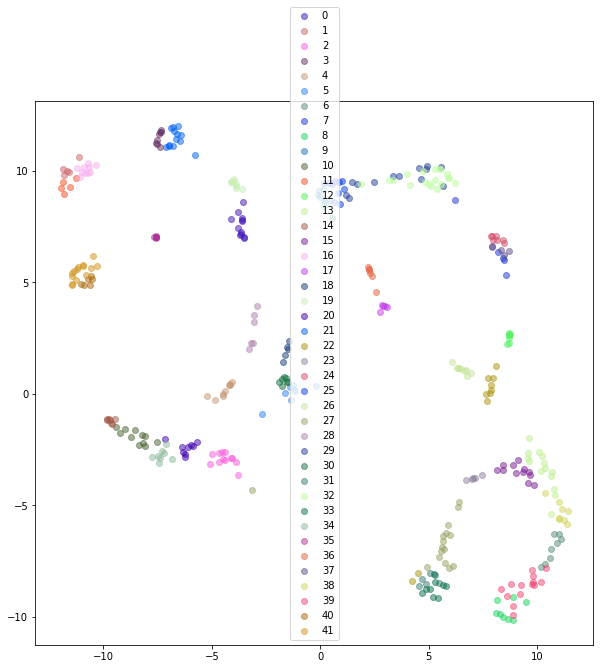

In [ ]:
import random
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
colors = []
test_classes = []
for i in range(42):
  r = lambda: random.randint(0,255)
  colors.append('#%02X%02X%02X' % (r(),r(),r()))
  test_classes.append(i)

def plot_embeddings(embeddings, targets):
  plt.figure(figsize=(10,10))
  for i in range(42):
    inds = np.where(targets==i)[0]
    plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5, color=colors[i])
    plt.legend(test_classes)

def extract_embeddings(dataloader, model):
  with torch.no_grad():
    model.eval()
    embeddings = np.zeros((len(dataloader.dataset), 128))
    labels = np.zeros(len(dataloader.dataset))
    k = 0
    for images, target in dataloader:
      images = images.to(device)
      embeddings[k:k+len(images)] = model(images).cpu().numpy()
      labels[k:k+len(images)] = target.numpy()
      k += len(images)
    return embeddings, labels

### Import and Plot Train Set ###
plotTransformTrain = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
plotDbTrain= datasets.ImageFolder("/content/drive/MyDrive/MiNet-test/Flickr-dog/",plotTransformTrain)
plotLoaderTrain = torch.utils.data.DataLoader(plotDbTrain,batch_size=30,shuffle=False)

embeds, labels = extract_embeddings(plotLoaderTrain, model)
tsne_data = tsne.fit_transform(embeds)
plot_embeddings(tsne_data, labels)

### Import and Plot Test Set ###
# plotTransform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
# plotDb= datasets.ImageFolder("/content/drive/MyDrive/MiNet-test/Flickr-dog-test/",plotTransform)
# plotLoader = torch.utils.data.DataLoader(plotDb,batch_size=30,shuffle=False)

# embeds, labels = extract_embeddings(plotLoader, model)
# tsne_data = tsne.fit_transform(embeds)
# plot_embeddings(tsne_data, labels)


In [ ]:
# ### Plot Losses ###
# f = plt.figure(figsize=(25,7))
# plt.subplot(1,2,1)
# plt.title(f'Loss (train: {round(trainlosses[-1], 3)}, test: {round(testlosses[-1], 3)})')
# plt.plot(range(len(trainlosses)), trainlosses[:], color = '#2c3e50', label = 'Train')
# plt.plot(range(len(testlosses)), testlosses[:], color = '#16a085', label = 'Test')
# plt.xlabel('Epoch', fontsize = 15)
# plt.ylabel('Loss', fontsize = 15)

# maxTrain = max(trainlosses)
# maxTest = max(testlosses)
# maxLoss = maxTrain if maxTrain > maxTest else maxTest
# plt.ylim(0, maxLoss*1.3)

# plt.legend(frameon=False)

# plt.xticks(np.arange(0, len(trainlosses)+1,1))

In [ ]:
from Utils.Generators import TripletGenerator

transformTrainTriplet = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
trainPathToDataTriplet = "/content/drive/MyDrive/MiNet-test/lfw-deepfunneled"

## for flickr test
#trainPathToDataTriplet = "/content/drive/MyDrive/MiNet-test/Flickr-dog"
####

allTripletData = TripletGenerator.TripletImageLoader(trainPathToDataTriplet,transformTrainTriplet)

trainDbTriplet = TripletGenerator.TripletImage(allTripletData,transformTrainTriplet,True)
trainLoaderTriplet = torch.utils.data.DataLoader(trainDbTriplet,batch_size=35,shuffle=True)

testDbTriplet = TripletGenerator.TripletImage(allTripletData,transformTrainTriplet,False)
testLoaderTriplet = torch.utils.data.DataLoader(testDbTriplet,batch_size=35,shuffle=False)

1 is done triplets so far - 10
2 is done triplets so far - 110
3 is done triplets so far - 210
4 is done triplets so far - 220
5 is done triplets so far - 320
6 is done triplets so far - 330
7 is done triplets so far - 340
8 is done triplets so far - 440
9 is done triplets so far - 540
10 is done triplets so far - 640
11 is done triplets so far - 650
12 is done triplets so far - 680
13 is done triplets so far - 740
14 is done triplets so far - 770
15 is done triplets so far - 780
16 is done triplets so far - 790
17 is done triplets so far - 890
18 is done triplets so far - 950
19 is done triplets so far - 960
20 is done triplets so far - 1060
21 is done triplets so far - 1160
22 is done triplets so far - 1190
23 is done triplets so far - 1200
24 is done triplets so far - 1210
25 is done triplets so far - 1220
26 is done triplets so far - 1320
27 is done triplets so far - 1330
28 is done triplets so far - 1340
29 is done triplets so far - 1350
30 is done triplets so far - 1360
31 is don